# MTA Playground
Important Note: This will only work with **TIME-CLEANED** version of csv file

In [1]:
import pandas as pd
from datetime import datetime as dt
print("Hello World!")
print("If you can read this message, the kernel is WORKING.")

Hello World!
If you can read this message, the kernel is WORKING.


### Create Dataframe
Note that "CombinedTurnstile.csv" contains all content of all file, but it may be too large

In [2]:
df = pd.read_csv("cleaned_CombinedTurnstile.csv")
df.columns = df.columns.str.strip()
df["DATE"] = pd.to_datetime(df["DATE"], format='%m/%d/%Y')
df["TIME"] = pd.to_datetime(df["TIME"], format="%m/%d/%Y %H:%M:%S")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-06-24,2017-06-24 00:00:00,REGULAR,6233682,2110437
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-06-24,2017-06-24 04:00:00,REGULAR,6233696,2110445
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-06-24,2017-06-24 08:00:00,REGULAR,6233712,2110473
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-06-24,2017-06-24 12:00:00,REGULAR,6233790,2110560
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-06-24,2017-06-24 16:00:00,REGULAR,6233942,2110622


In [3]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
589666,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2017-07-14,2017-07-14 05:00:00,REGULAR,5554,306
589667,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2017-07-14,2017-07-14 09:00:00,REGULAR,5554,306
589668,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2017-07-14,2017-07-14 13:00:00,REGULAR,5554,306
589669,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2017-07-14,2017-07-14 17:00:00,REGULAR,5554,306
589670,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2017-07-14,2017-07-14 21:00:00,REGULAR,5554,306


#### (Debugging Purpose) Dataframe Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589671 entries, 0 to 589670
Data columns (total 11 columns):
C/A         589671 non-null object
UNIT        589671 non-null object
SCP         589671 non-null object
STATION     589671 non-null object
LINENAME    589671 non-null object
DIVISION    589671 non-null object
DATE        589671 non-null datetime64[ns]
TIME        589671 non-null datetime64[ns]
DESC        589671 non-null object
ENTRIES     589671 non-null int64
EXITS       589671 non-null int64
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 49.5+ MB


#### (Debugging Purpose) Show the list of all station

In [5]:
#print(set(df["STATION"]))
print(len(set(df["STATION"])))
#We have 376 Stations

376


## Preparation for Future Play
In this section, I will store all data by (C/A,UNIT,STATION) then by SCP then by date and time. The purpose of this section is to prepare data for later uses.

In [6]:
bigDict = {}
for i,row in df.iterrows():
    t1 = (row["C/A"],row["UNIT"],row["STATION"])
    t2 = row["SCP"]
    t3 = (row["TIME"],row["EXITS"])
    if t1 not in bigDict:
        bigDict[t1] = {}
    if t2 not in bigDict[t1]:
        bigDict[t1][t2] = []
    bigDict[t1][t2].append(t3)
    bigDict[t1][t2].sort() #This line is NOT necessary if our dataframe is sorted in correct chonological order
print("Done!")

Done!


## Data Cleanup
Due to bugs in MTA data, this section is used to remove "incorrect" data

In [7]:
print(len(bigDict))
trouble = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue
                
            #print("Problem Detected: ",st,scp)
            #print(lst[i-1],lst[i],lst[i+1])
            key = (st,scp)
            trouble[key] = trouble.get(key,0)+1
print("Trouble List: ",len(trouble.keys()))
for k,v in trouble.items():
    print(k,v)

732
Trouble List:  119
(('A011', 'R080', '57 ST-7 AV'), '01-00-00') 131
(('A011', 'R080', '57 ST-7 AV'), '01-00-03') 131
(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00') 2
(('A043', 'R462', 'CANAL ST'), '00-06-00') 2
(('A050', 'R088', 'CORTLANDT ST'), '00-03-00') 2
(('A069', 'R044', 'CHAMBERS ST'), '01-06-01') 120
(('B012', 'R196', 'PROSPECT PARK'), '00-00-00') 124
(('B024', 'R211', 'KINGS HWY'), '00-05-01') 10
(('C021', 'R212', '59 ST'), '00-00-02') 125
(('D008', 'R392', '18 AV'), '00-00-02') 124
(('E001', 'R368', '9 AV'), '00-00-04') 2
(('H003', 'R163', '6 AV'), '01-00-02') 124
(('H023', 'R236', 'DEKALB AV'), '00-00-02') 2
(('JFK01', 'R535', 'HOWARD BCH JFK'), '00-00-02') 1
(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00') 2
(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-03') 2
(('J034', 'R007', '104 ST'), '00-00-01') 120
(('J034', 'R007', '104 ST'), '00-00-02') 91
(('K026', 'R100', 'METROPOLITAN AV'), '00-00-01') 55
(('N016A', 'R296', '163 ST-AMSTERDM'), '00-00-01') 124
(('N029', 'R

#### Printing Function
This function take input in form of (C/A,UNIT,STATION). It will print all information for that station

In [8]:
#Debugging Purpose
def StationTest(stationInfo):
    print("***********")
    print("Summary for",stationInfo)
    for k1,v1 in bigDict[stationInfo].items():
        print(" SCP:",k1)
        v1.sort()
        for v2 in v1:
            print(" ",v2)
        print(" -------")
    print("***********")

#StationTest(('R204', 'R043', 'WALL ST'))

In [9]:
#More Debugging Stuff
#print(bigDict[('R204', 'R043', 'WALL ST')])

In [10]:
#Problem Detected
#StationTest(('PTH11', 'R545', '14TH STREET'))

In [11]:
import matplotlib.pyplot as plt
def inspection(stationInfo,scp):
    t = []
    r = []
    for v in bigDict[stationInfo][scp]:
        t.append(v[0])
        r.append(v[1])
    plt.plot(t,r,".r")
    plt.title(str(stationInfo)+" "+scp)
    plt.xlabel("Time")
    plt.ylabel("Data")
    plt.show()
    
def inspection2(tup):
    inspection(tup[0],tup[1])
    
#inspection(('PTH11', 'R545', '14TH STREET'),'00-00-03')
#inspection(('R204', 'R043', 'WALL ST'),"02-03-02")
#inspection2((('A037', 'R170', '14 ST-UNION SQ'), '05-00-00'))
#inspection2((('R416', 'R245', 'ST LAWRENCE AV'), '00-00-00'))

All Trouble
Total Trouble: 119


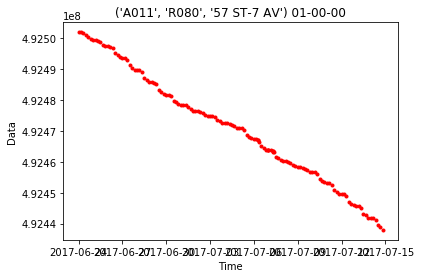

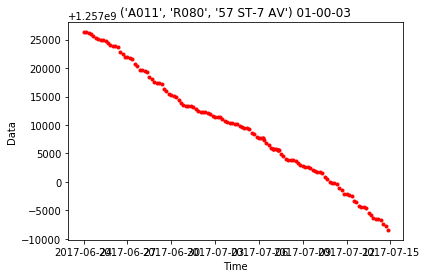

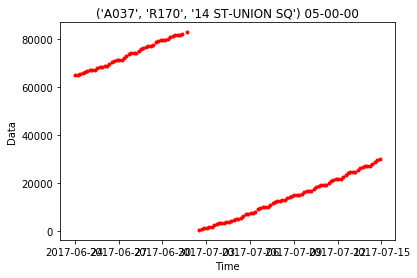

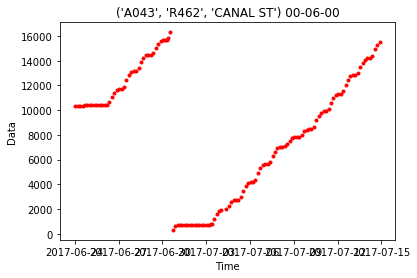

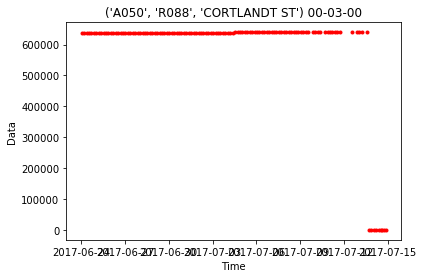

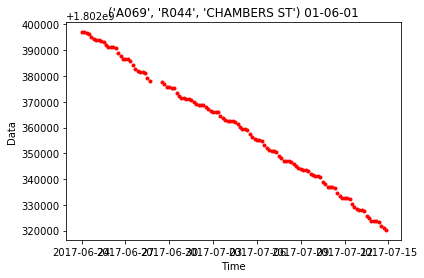

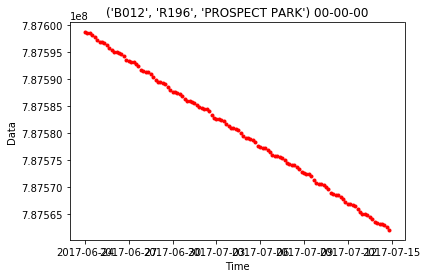

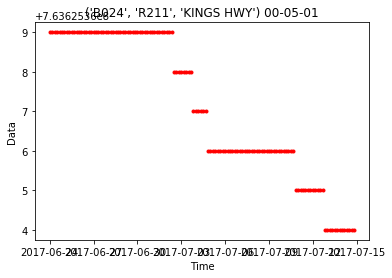

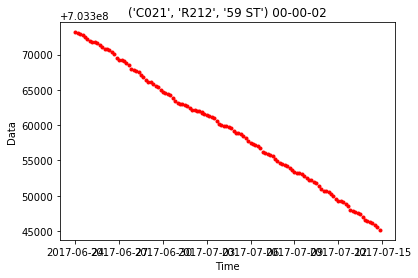

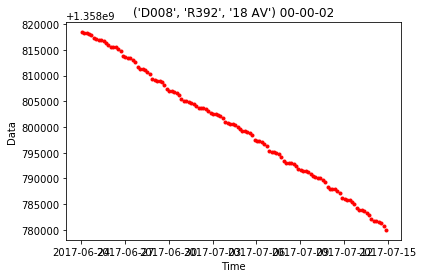

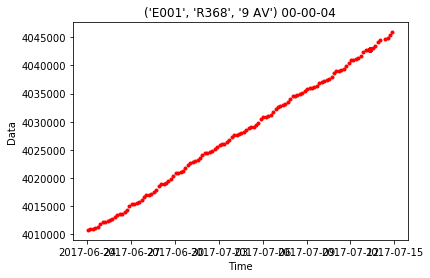

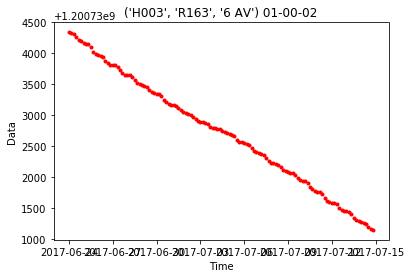

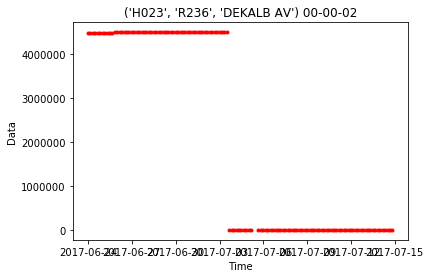

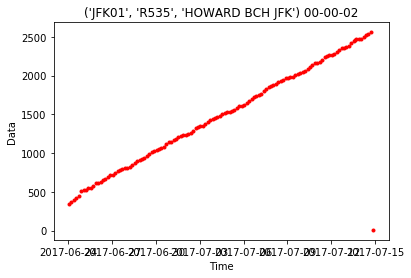

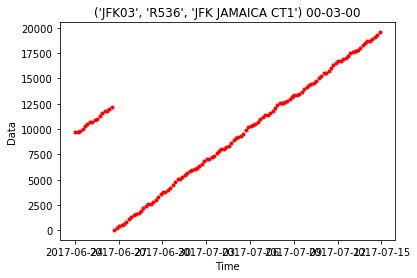

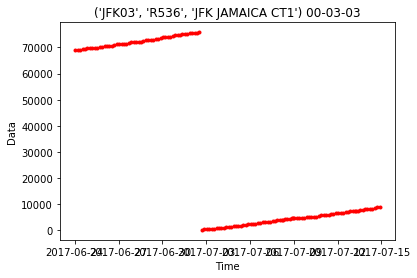

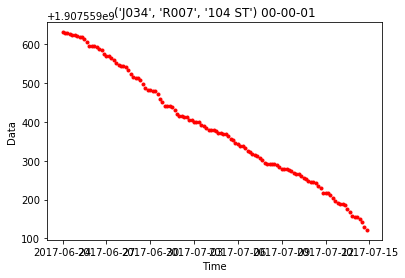

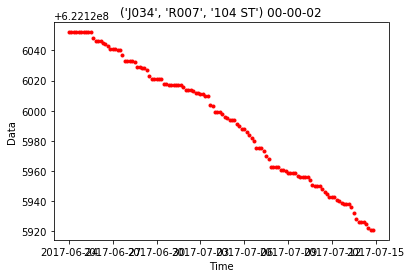

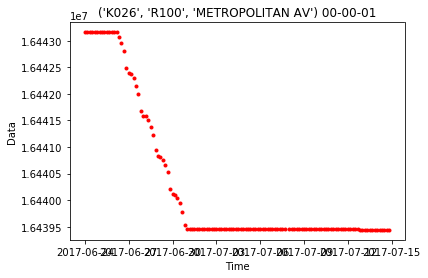

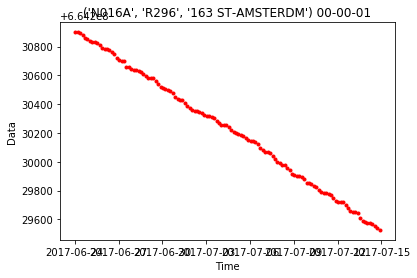

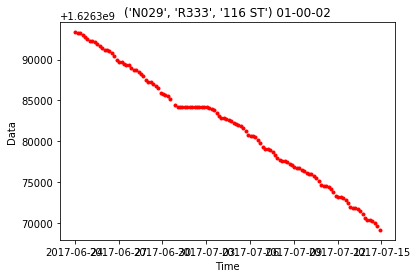

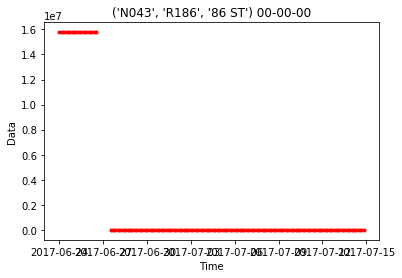

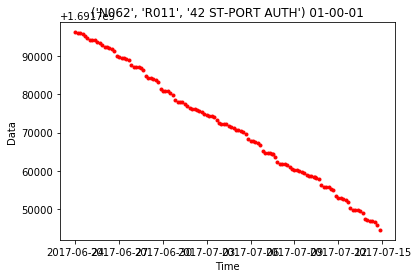

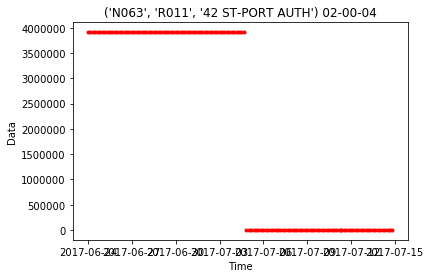

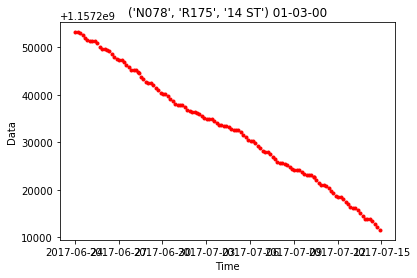

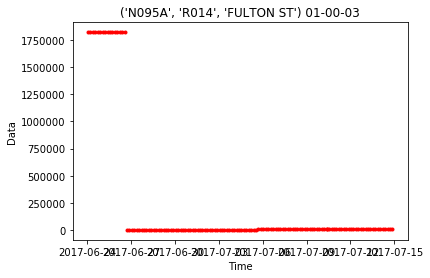

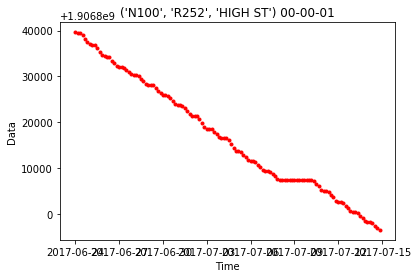

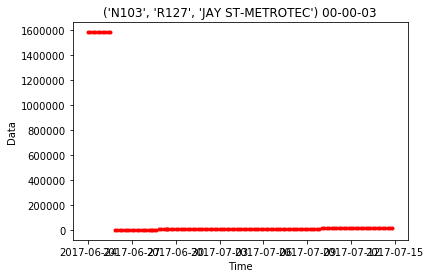

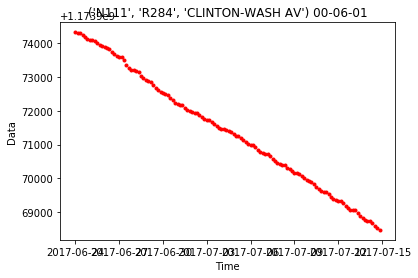

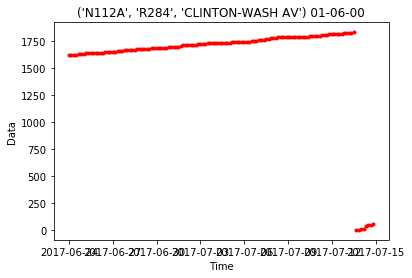

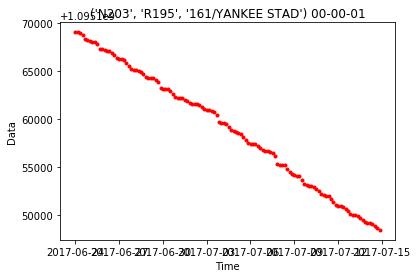

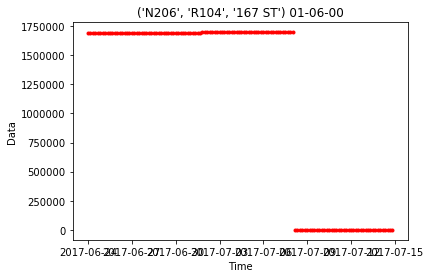

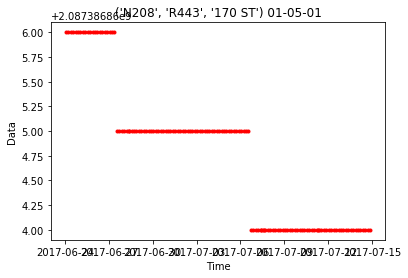

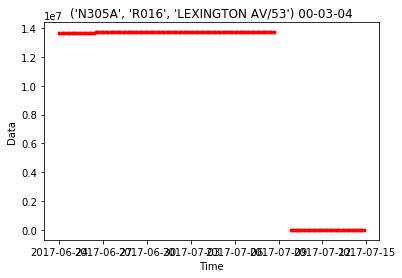

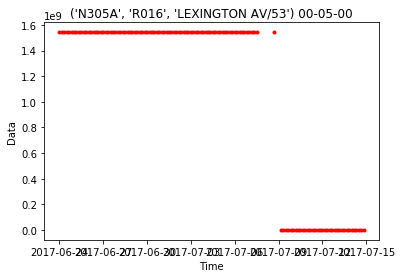

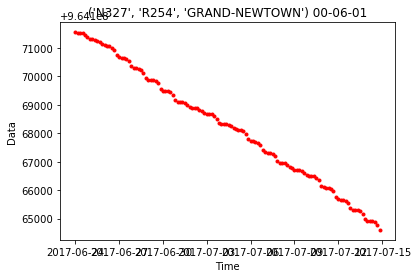

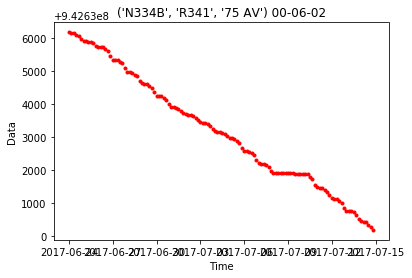

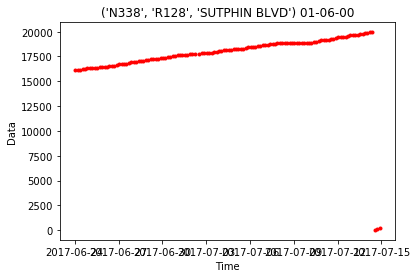

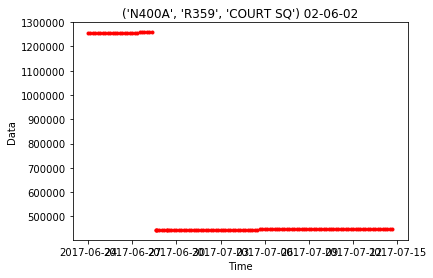

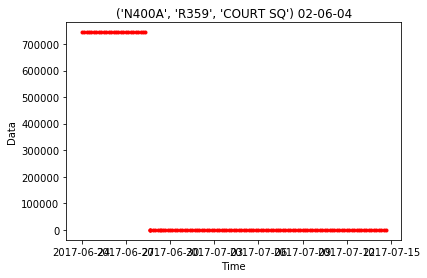

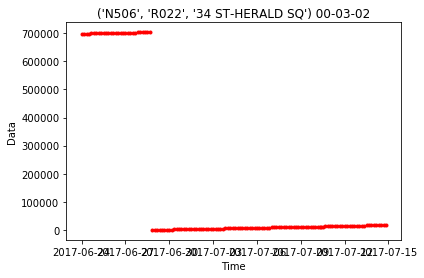

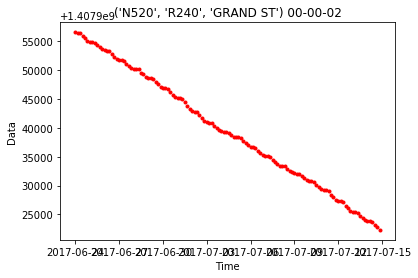

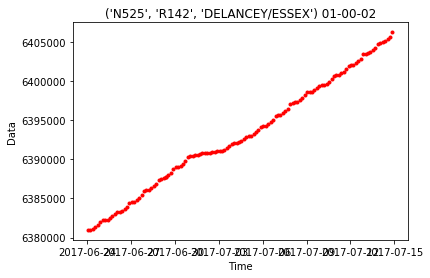

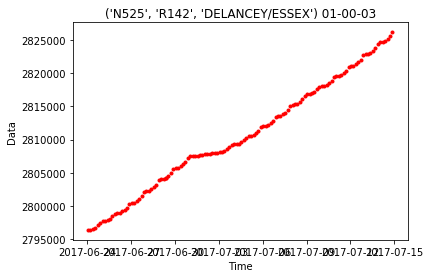

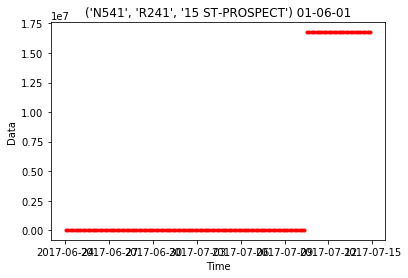

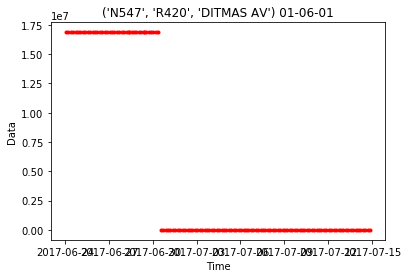

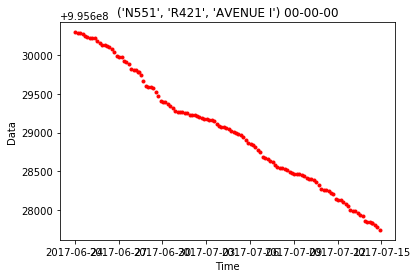

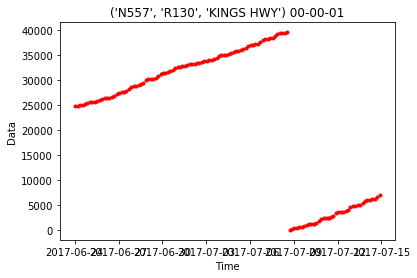

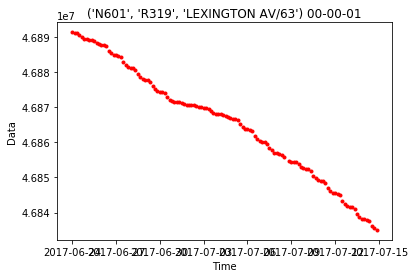

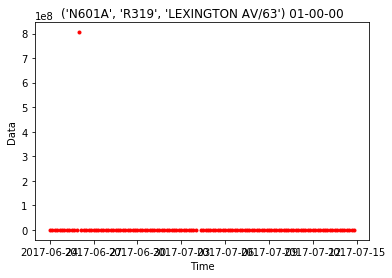

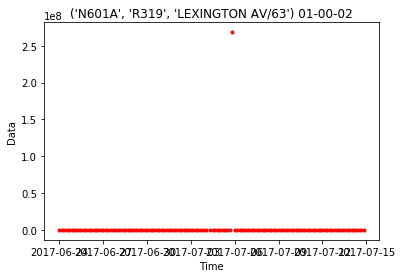

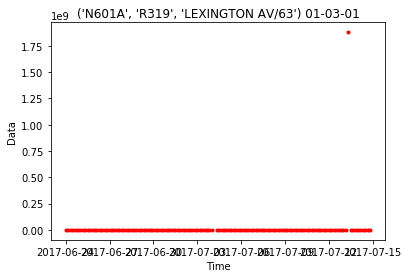

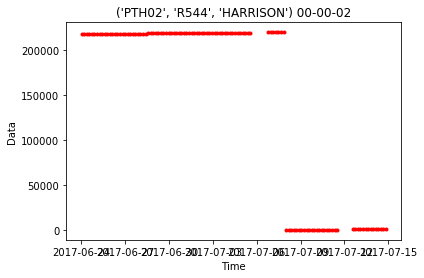

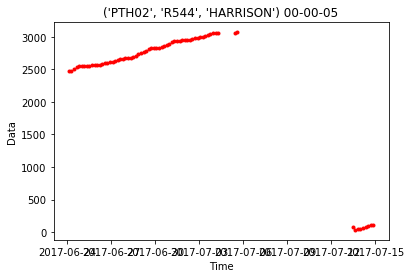

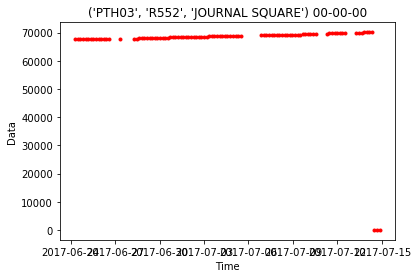

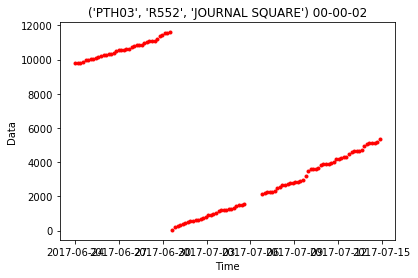

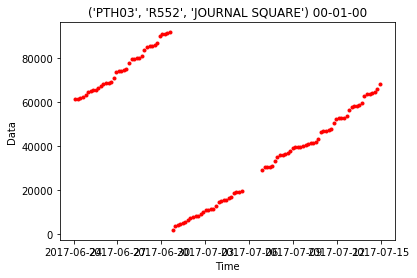

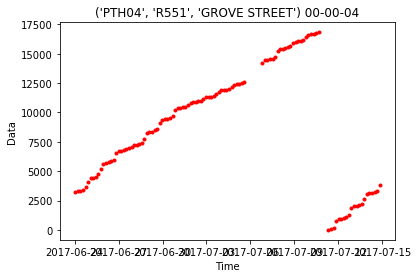

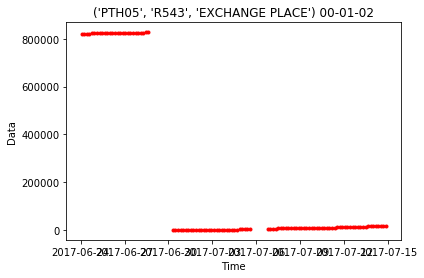

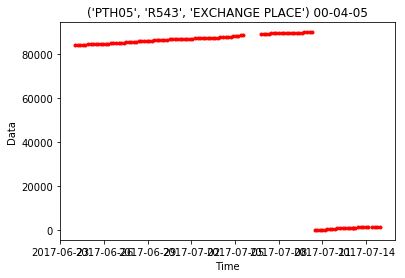

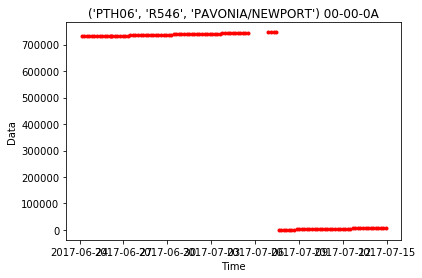

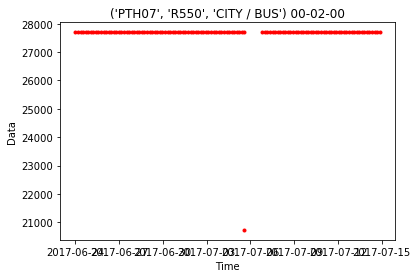

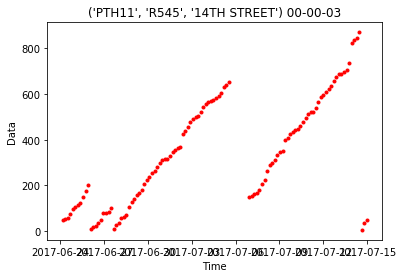

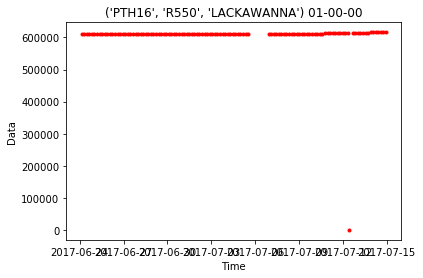

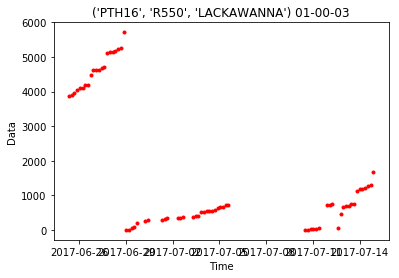

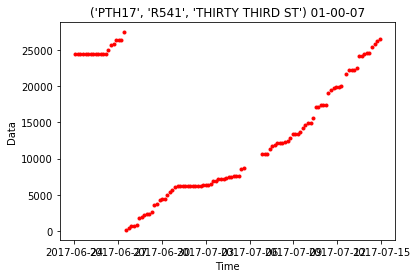

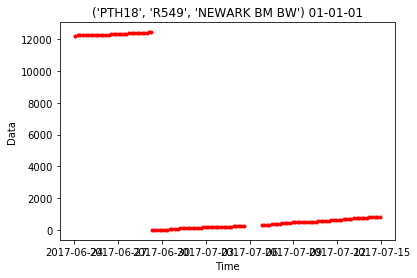

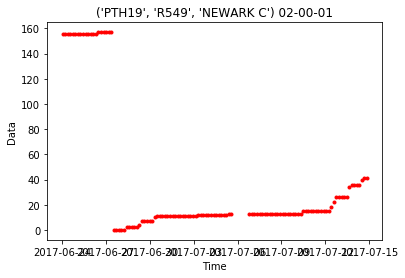

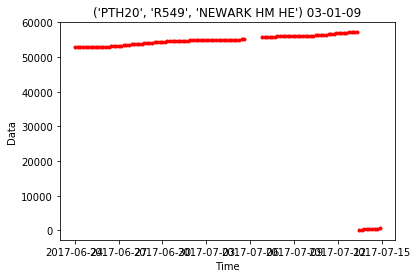

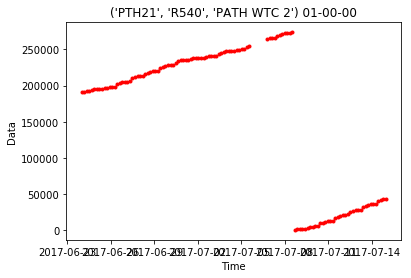

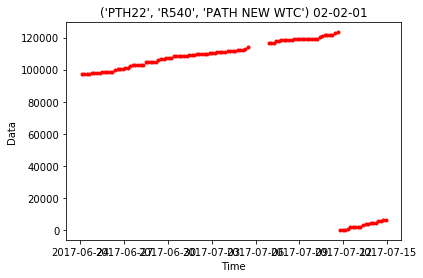

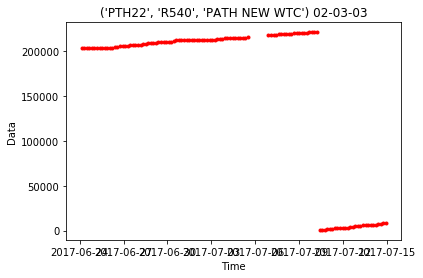

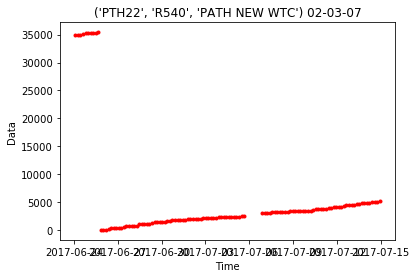

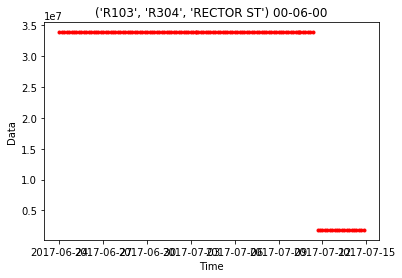

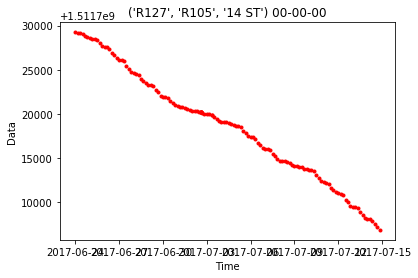

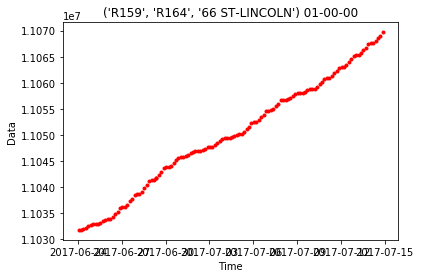

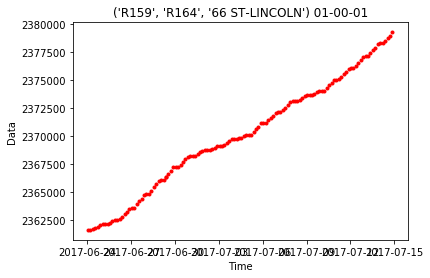

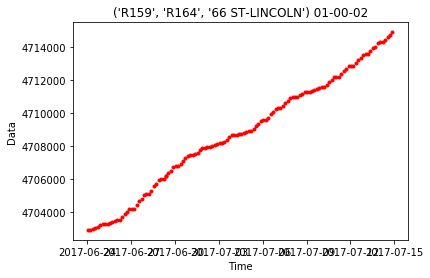

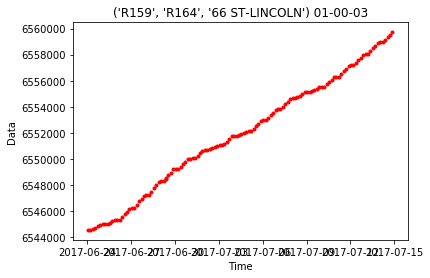

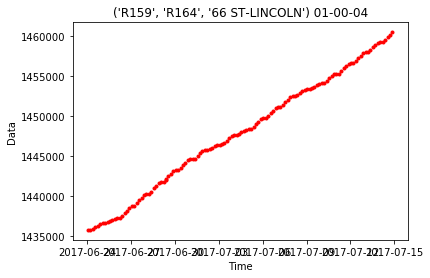

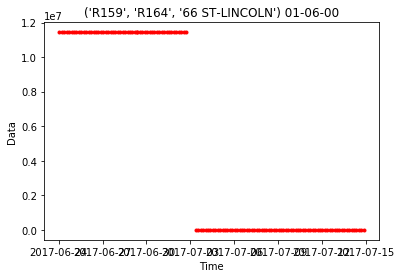

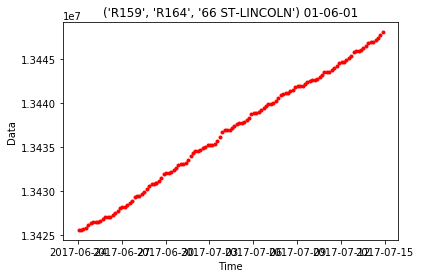

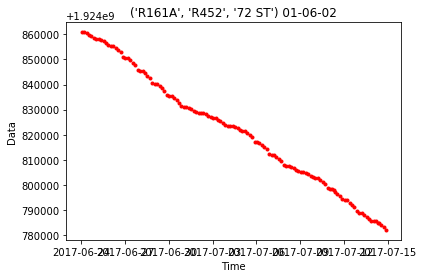

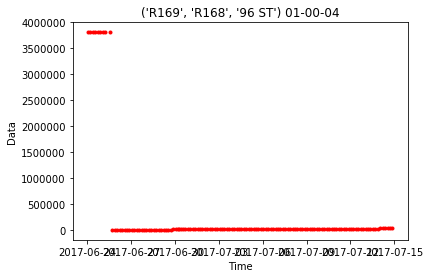

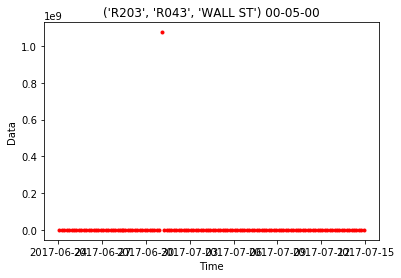

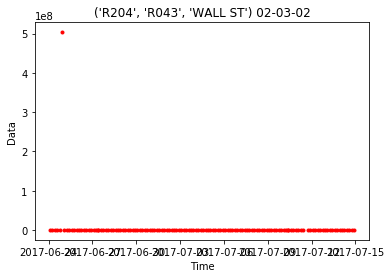

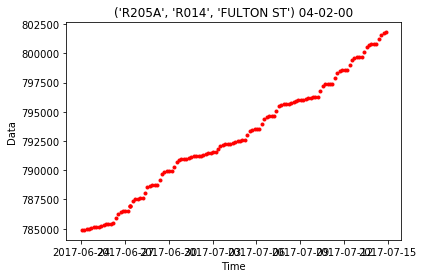

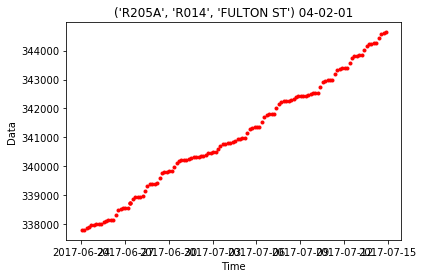

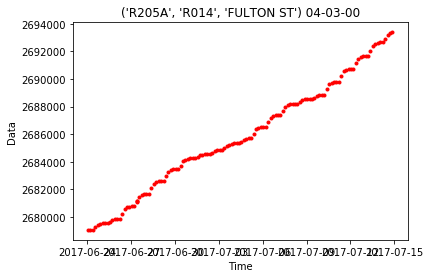

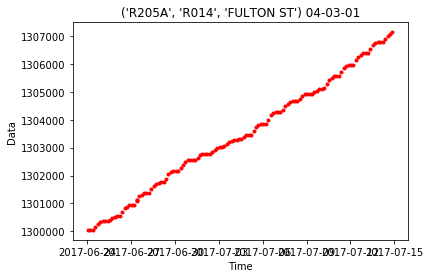

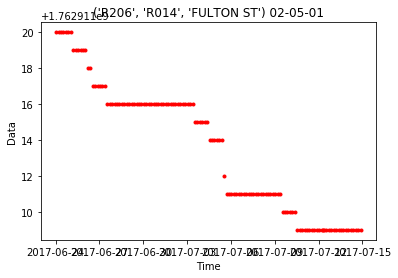

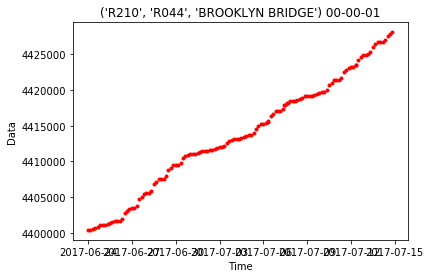

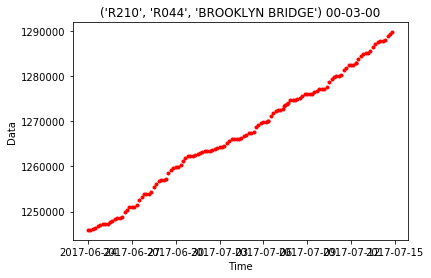

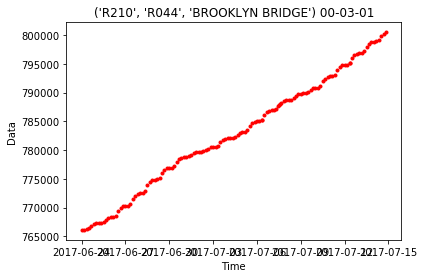

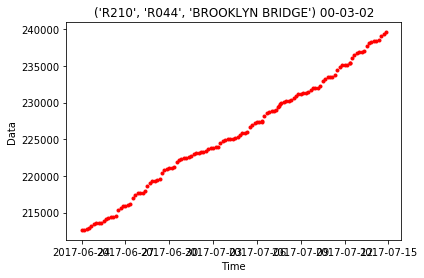

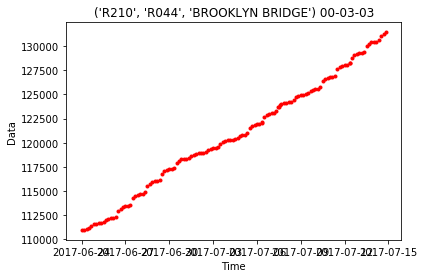

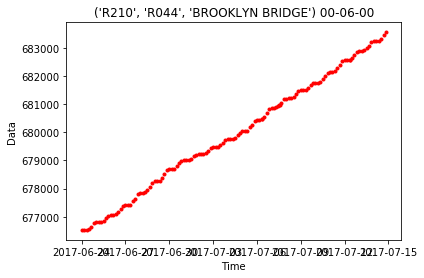

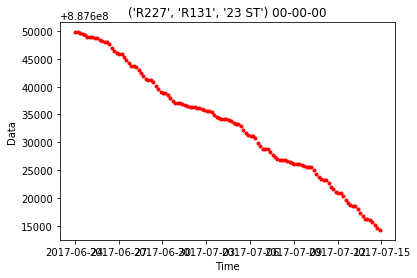

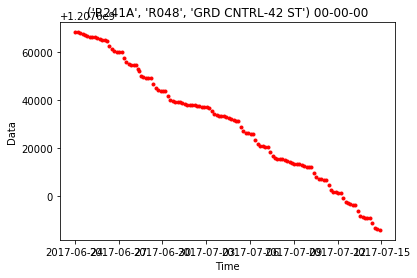

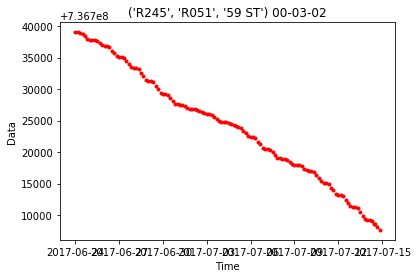

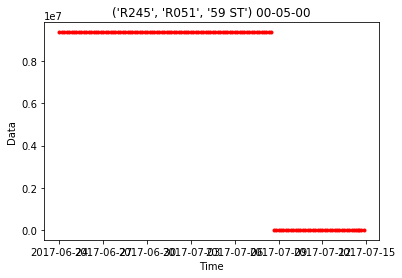

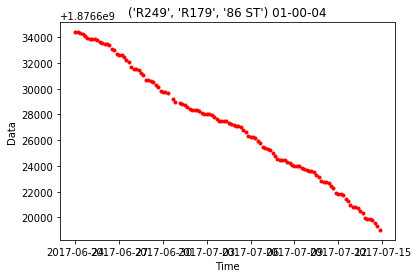

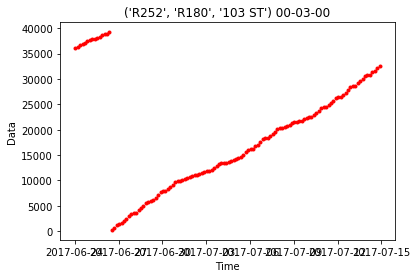

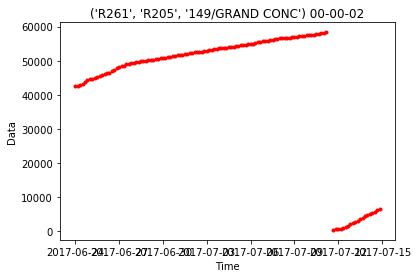

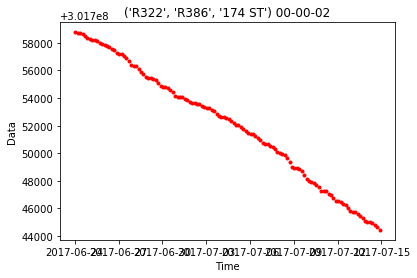

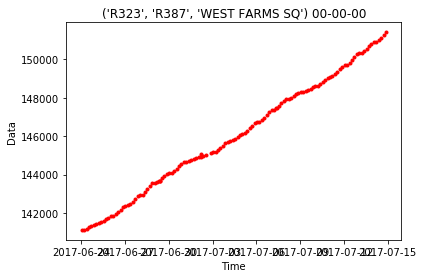

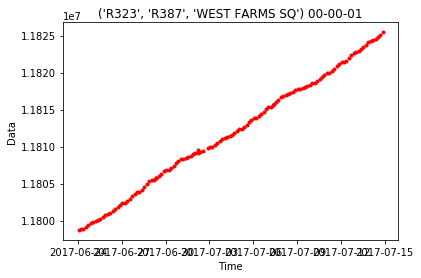

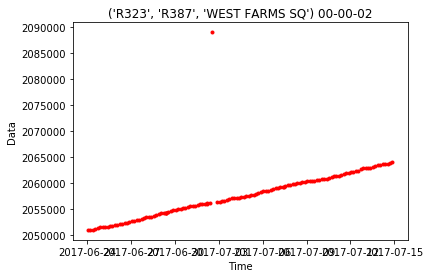

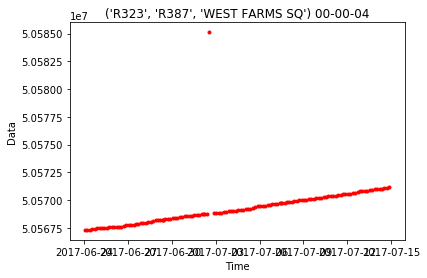

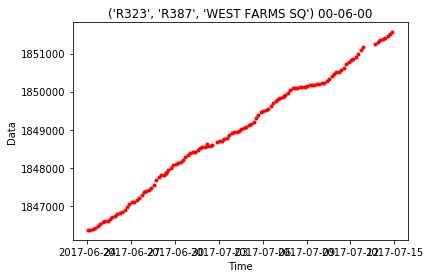

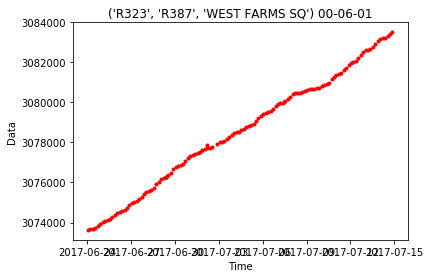

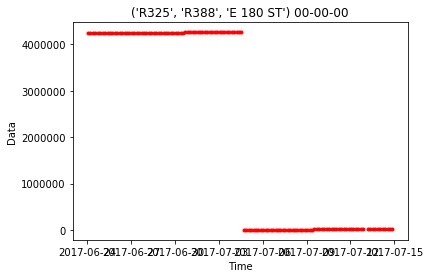

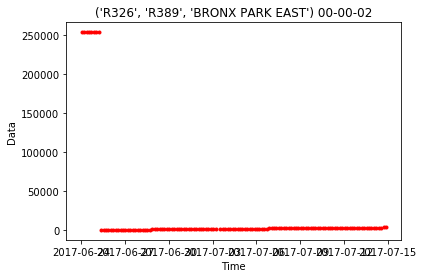

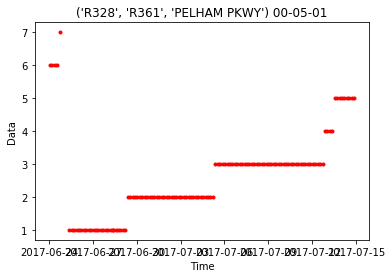

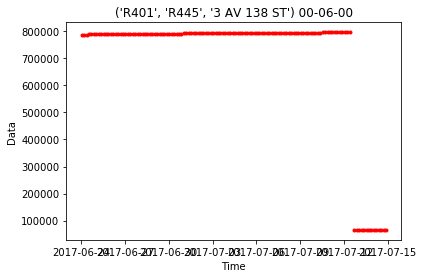

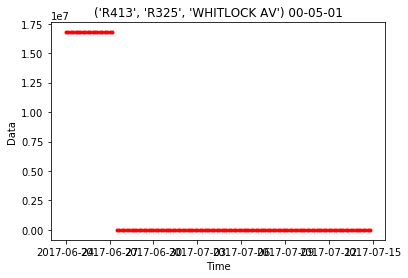

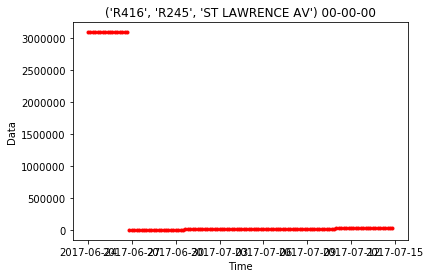

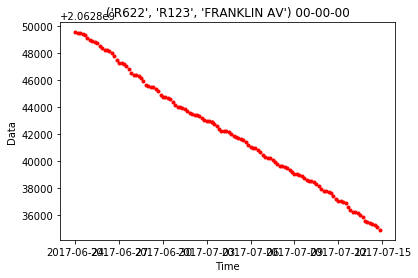

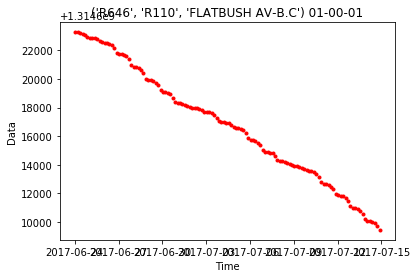

In [12]:
#All Trouble
print("All Trouble")
print("Total Trouble:",len(trouble))
for troubleStation in trouble.keys():
    inspection2(troubleStation)

## Dealing with Incorrect Data
You may skip to the next section

#### Mistake Type I: Montone but Decreasing

Total Monotone Decrease: 35
Problem Fixed!
Total Monotone Decrease: 35


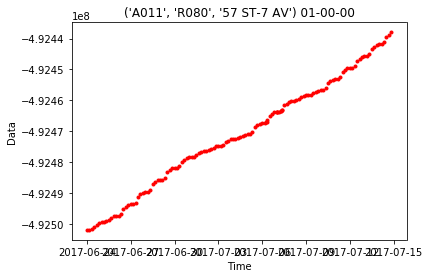

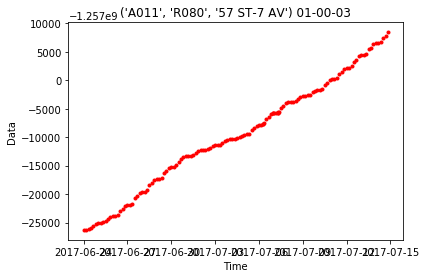

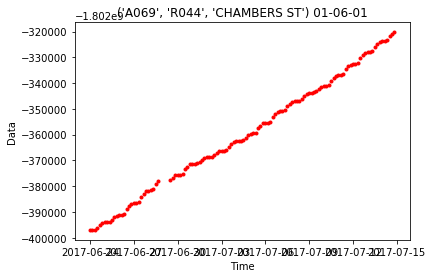

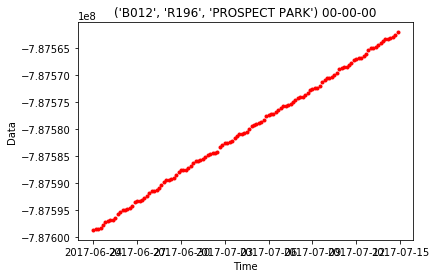

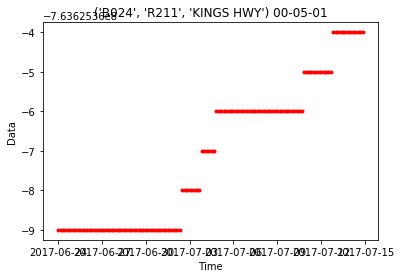

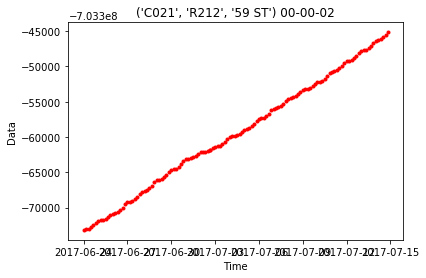

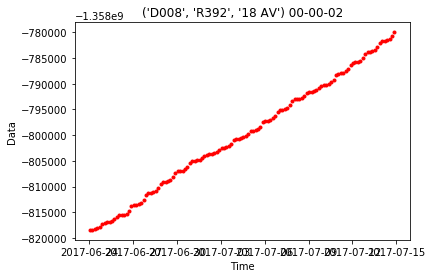

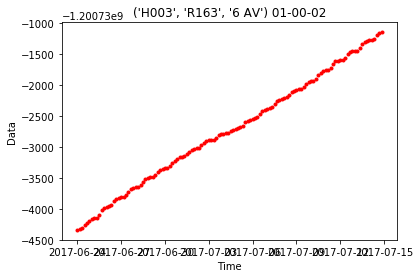

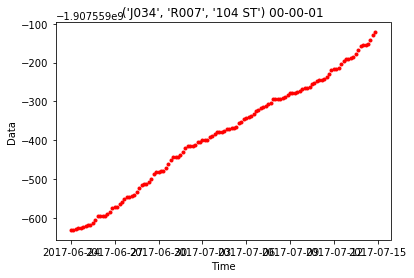

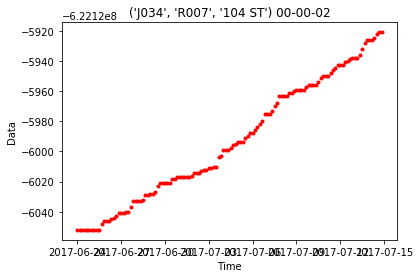

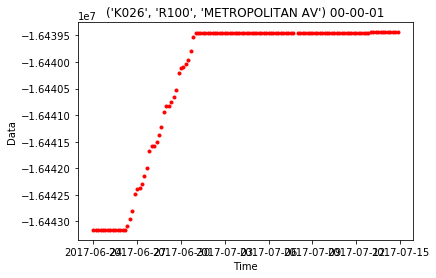

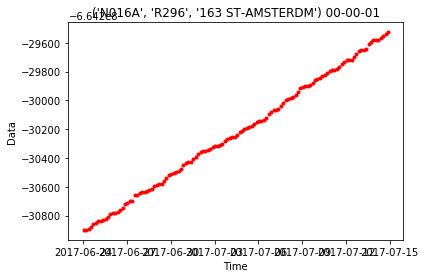

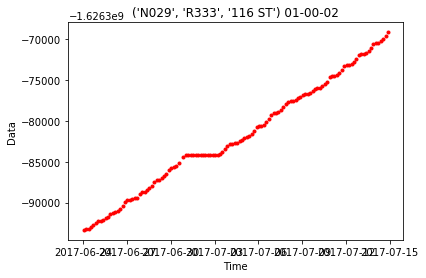

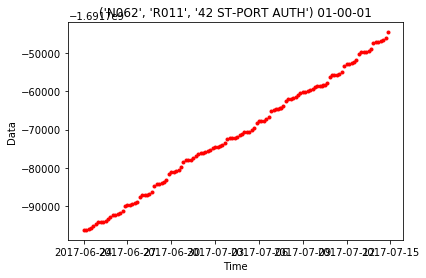

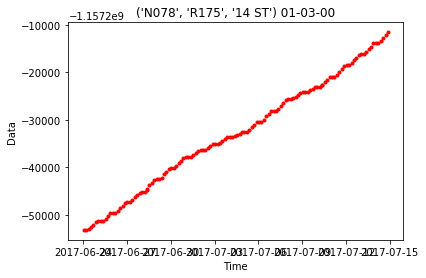

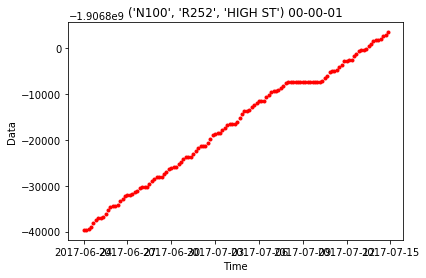

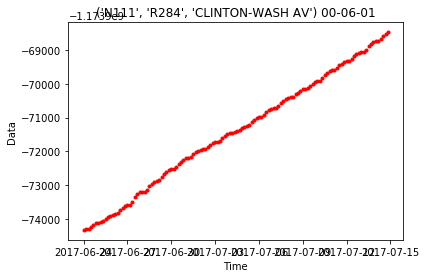

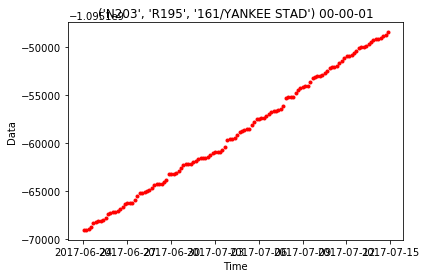

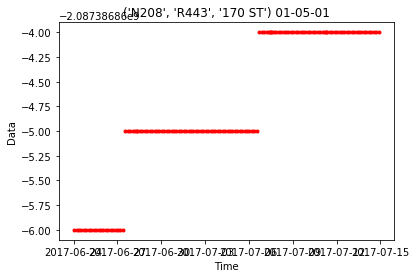

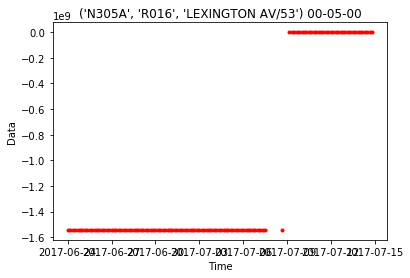

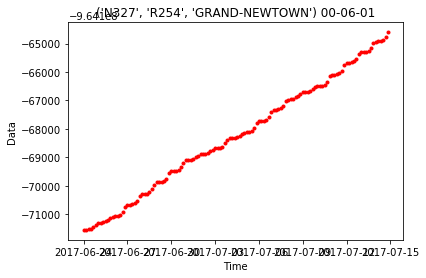

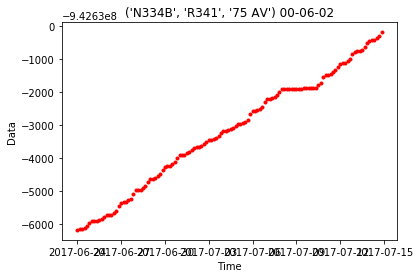

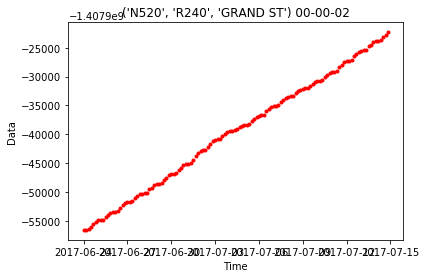

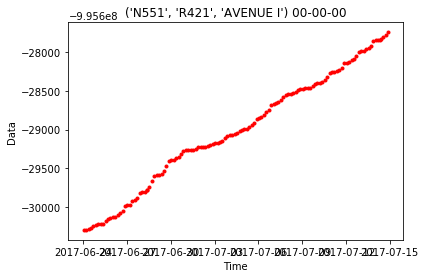

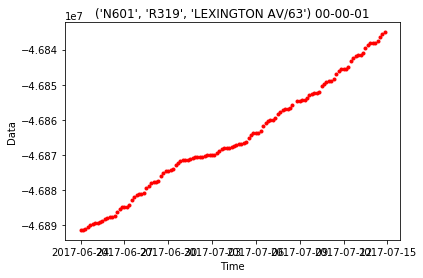

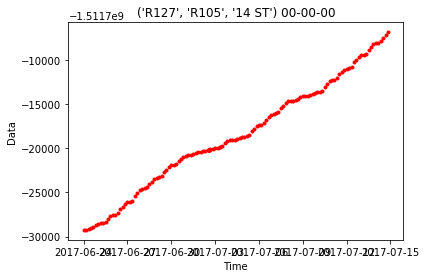

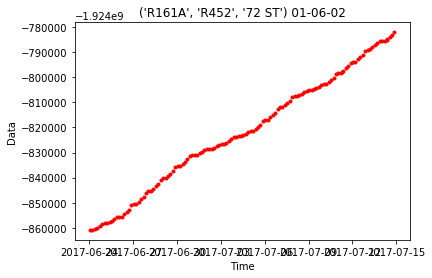

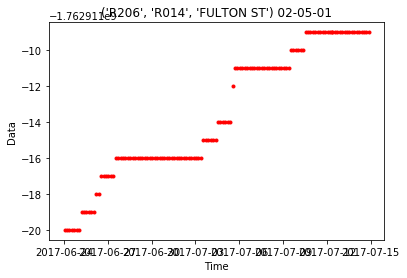

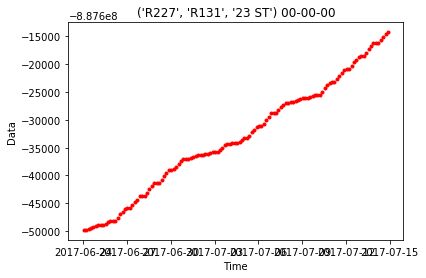

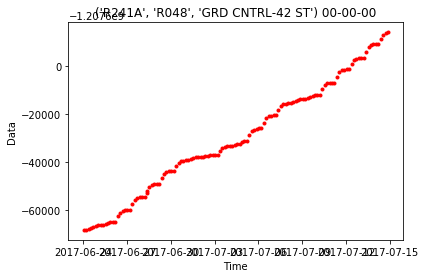

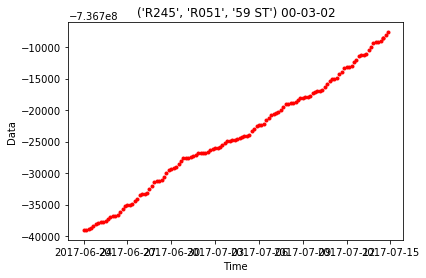

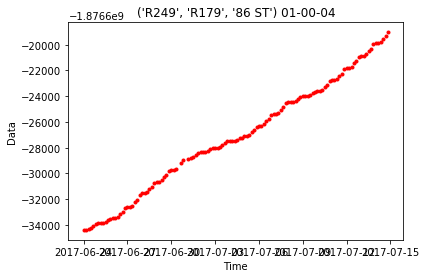

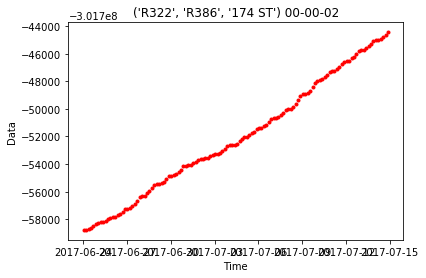

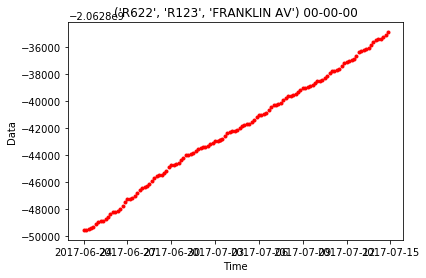

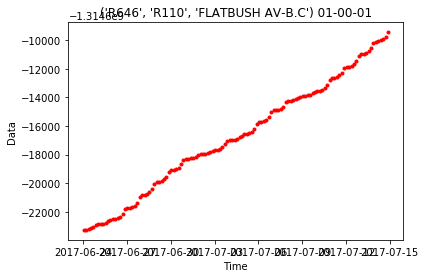

In [13]:
#Input: Tuple of (Station,SCP)
#Output: True if this SCP has monotone property, but decreasing, False otherwise.
def isMonotoneDecrease(tup):
    n = len(bigDict[tup[0]][tup[1]])
    for i in range(n-1):
        if(bigDict[tup[0]][tup[1]][i+1][1]>bigDict[tup[0]][tup[1]][i][1]):
            return False
    return True

def fixMonotoneDecrease(tup):
    n = len(bigDict[tup[0]][tup[1]])
    for i in range(n):
        bigDict[tup[0]][tup[1]][i] = (bigDict[tup[0]][tup[1]][i][0],(-1)*bigDict[tup[0]][tup[1]][i][1])
    

monotoneDecreaseList = []
for k in trouble:
    if(isMonotoneDecrease(k)):
        monotoneDecreaseList.append(k)
print("Total Monotone Decrease:",len(monotoneDecreaseList))
for k in monotoneDecreaseList:
    fixMonotoneDecrease(k)
print("Problem Fixed!")
#monotoneDecreaseList = []
for k in trouble:
    if(isMonotoneDecrease(k)):
        monotoneDecreaseList.append(k)
print("Total Monotone Decrease:",len(monotoneDecreaseList))
for k in monotoneDecreaseList:
    inspection2(k)

#### Mistake Type II: Garbage Value

Garbage Removed: 33


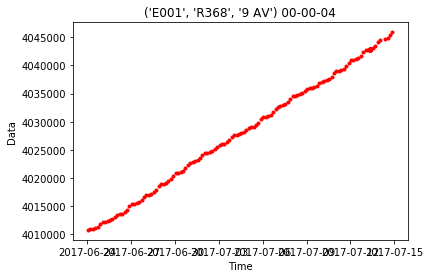

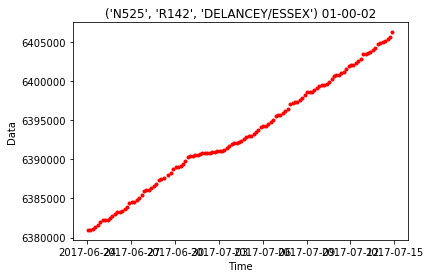

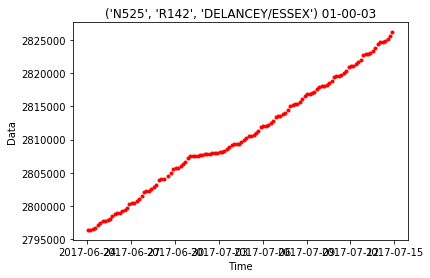

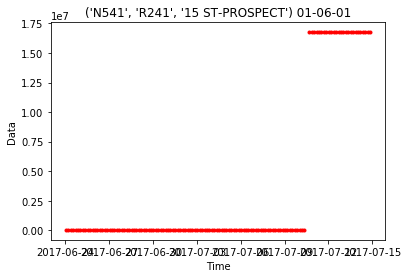

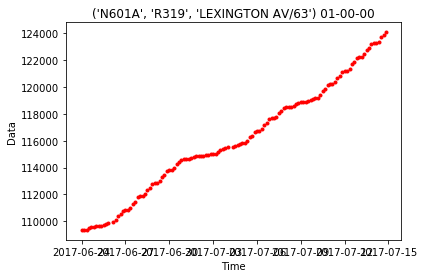

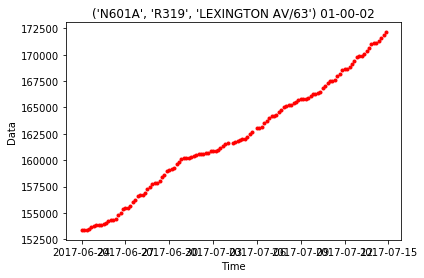

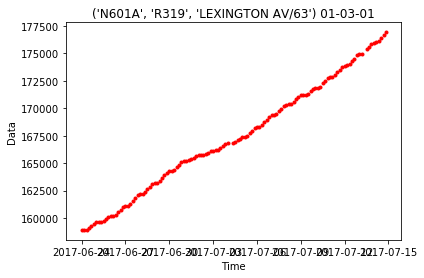

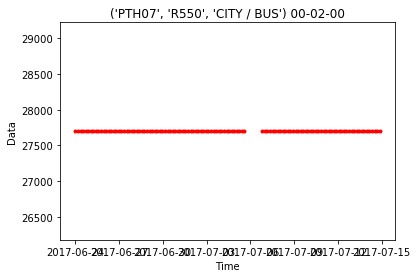

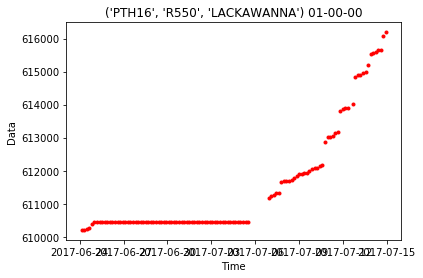

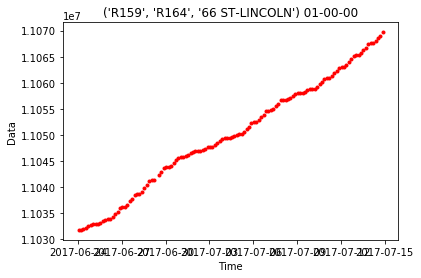

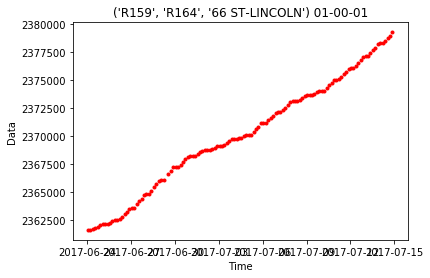

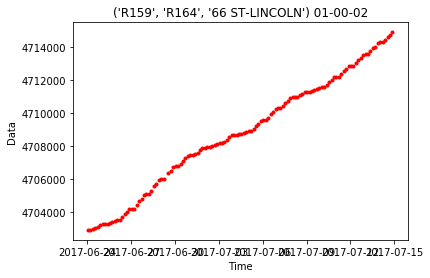

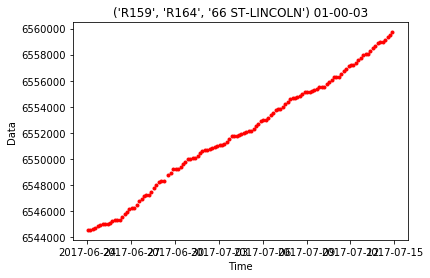

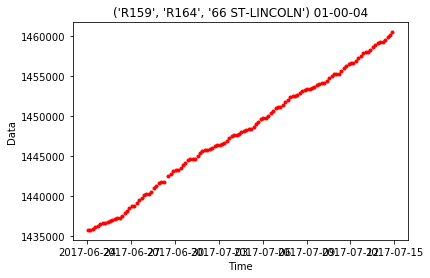

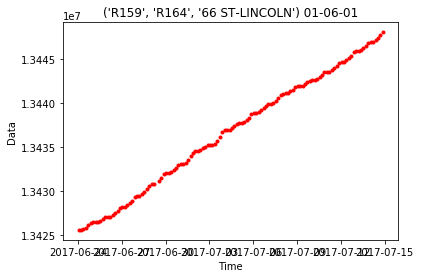

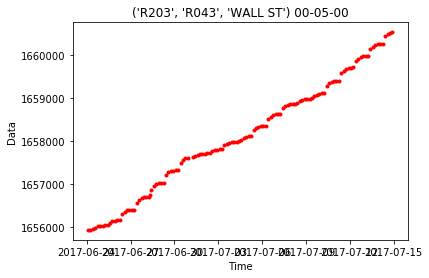

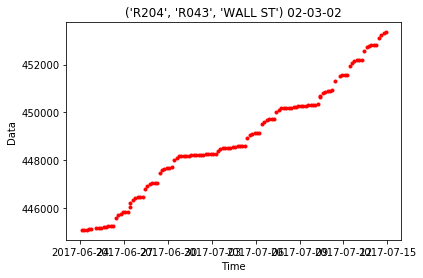

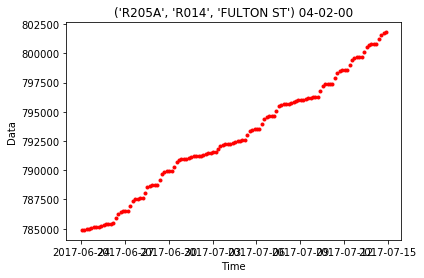

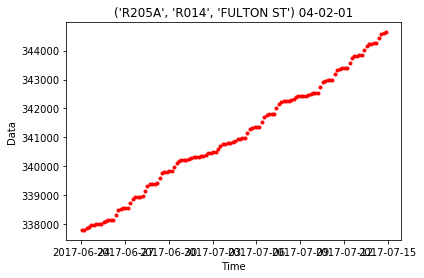

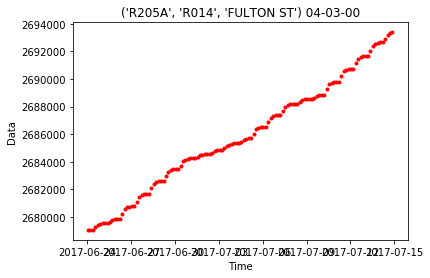

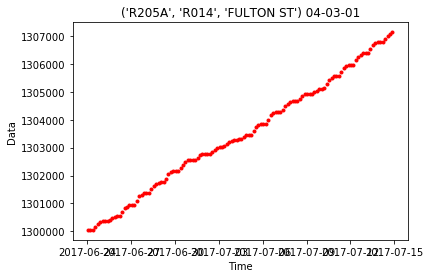

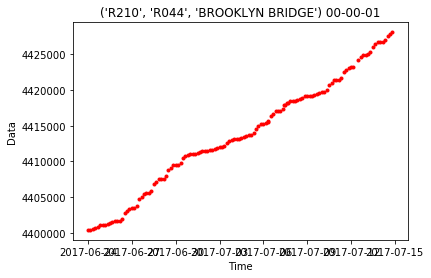

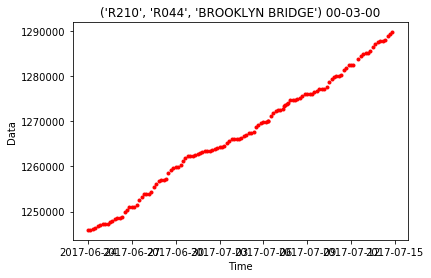

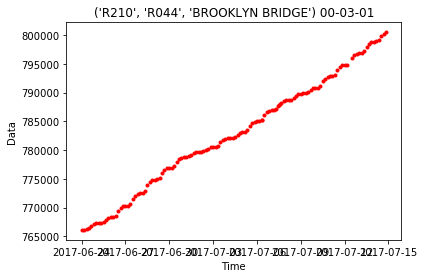

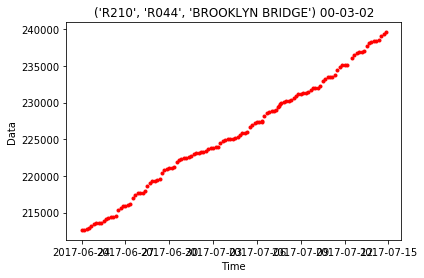

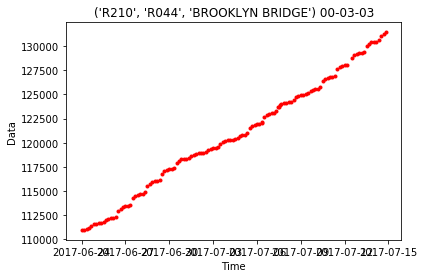

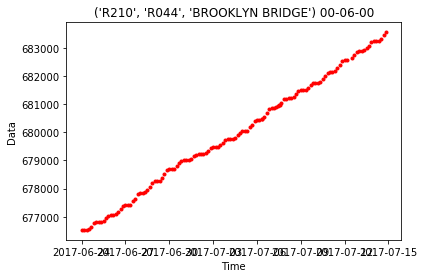

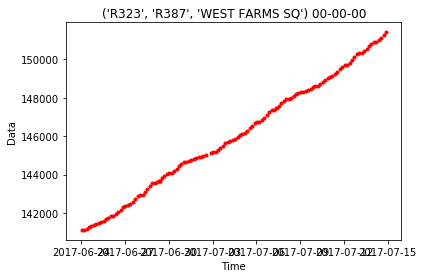

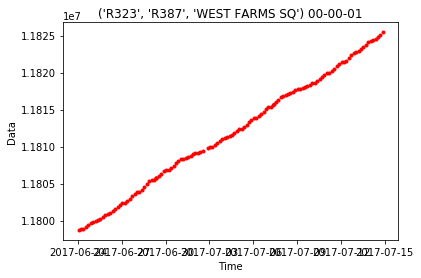

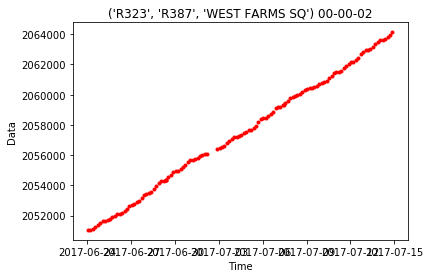

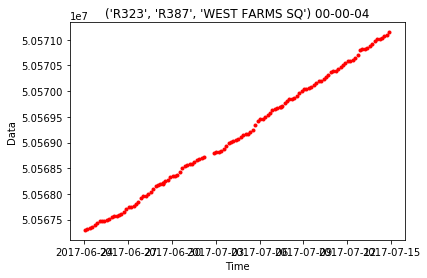

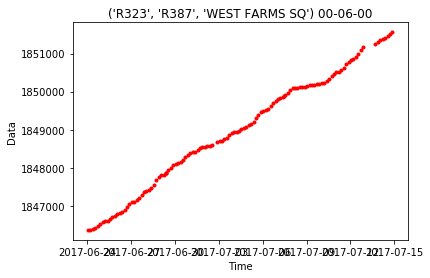

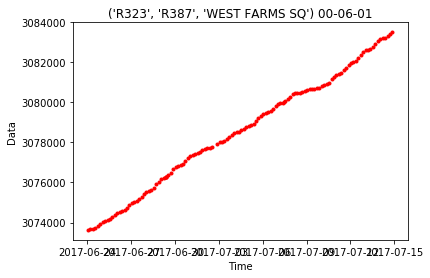

In [14]:
def garbageEliminator(tup):
    n = len(bigDict[tup[0]][tup[1]])
    toDel = []
    for i in range(1,n-1):
        if((bigDict[tup[0]][tup[1]][i-1][1]>bigDict[tup[0]][tup[1]][i+1][1])):
            continue
        if((bigDict[tup[0]][tup[1]][i-1][1]<=bigDict[tup[0]][tup[1]][i][1]) and (bigDict[tup[0]][tup[1]][i][1]<=bigDict[tup[0]][tup[1]][i+1][1])):
            continue
        toDel.append(bigDict[tup[0]][tup[1]][i])
    #Deletion Process
    if(len(toDel)==0):
        return 0
    for k in toDel:
        bigDict[tup[0]][tup[1]].remove(k)
    return 1


#Driver
cnt = 0
healList = []
for k in trouble:
    if(garbageEliminator(k)):
        healList.append(k)
print("Garbage Removed:",len(healList))
for k in healList:
    inspection2(k)

#### Mistake Type III: Turnstile Reset

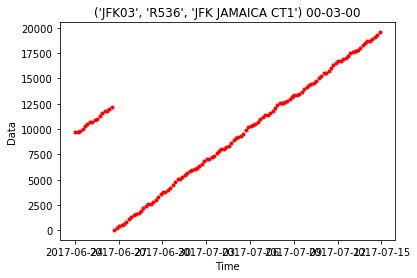

Cleaned


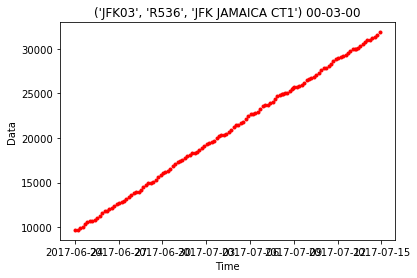

In [15]:
def dealingWithReset(tup):
    sta = tup[0]
    tsl = tup[1]
    n = len(bigDict[sta][tsl])
    #Detecting Part
    resetPoint = [] # it means (i,i+1) is reset
    resetSet = []
    for i in range(1,n-2):
        if(bigDict[sta][tsl][i][1]<=bigDict[sta][tsl][i+1][1]):
            continue #We don't need to change this one
        resetPoint.append(i)
    #Fixing Part
    resetSet = set(resetPoint)
    cumulative = 0
    for i in range(n-2):
        if(i not in resetSet):
            bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
            continue
        #Problem
        expected = (bigDict[sta][tsl][i][1]-bigDict[sta][tsl][i-1][1])+ (bigDict[sta][tsl][i+2][1]-bigDict[sta][tsl][i+1][1])
        expected = int(expected/2)
        shift = (bigDict[sta][tsl][i][1]+expected)-bigDict[sta][tsl][i+1][1]
        cumulative = shift
    for i in range(n-2,n):
        bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
    #Done!
    
#Test Usage
inspection2((('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00'))
dealingWithReset((('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00'))
print("Cleaned")
inspection2((('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00'))

## Overall Cleaning Process
Run this part, then everything should be cleaned

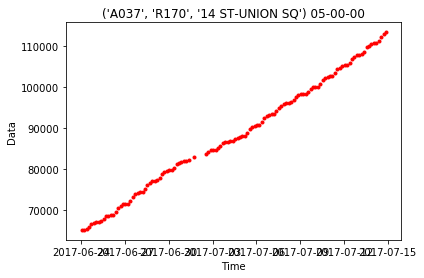

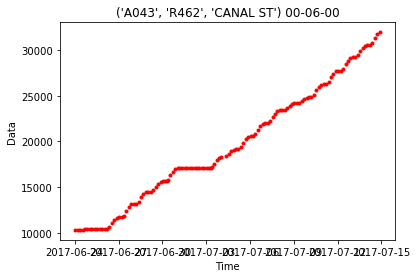

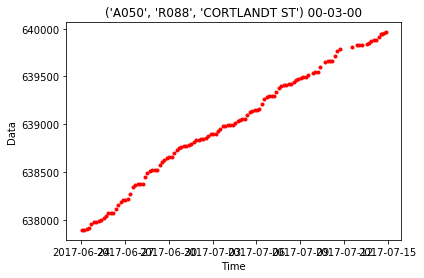

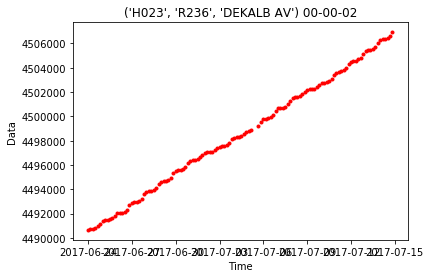

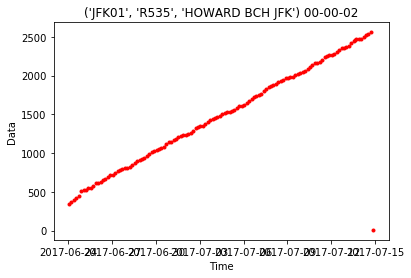

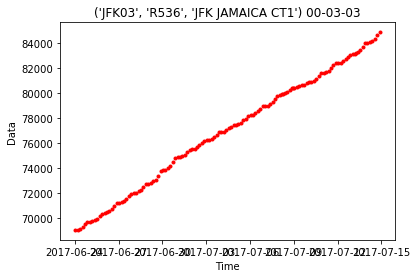

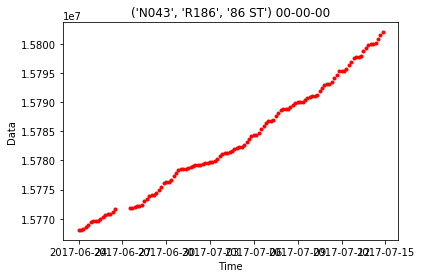

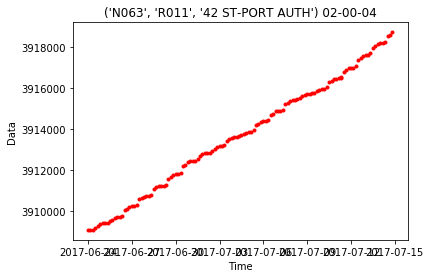

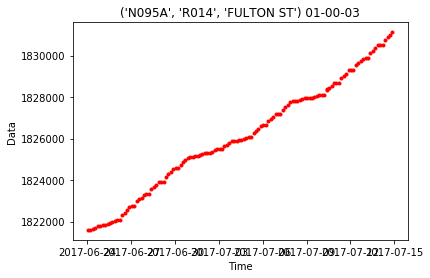

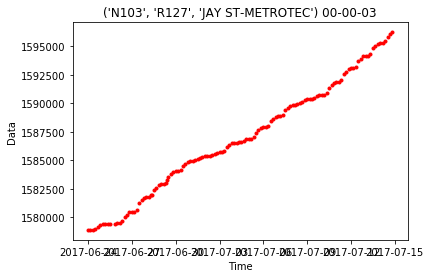

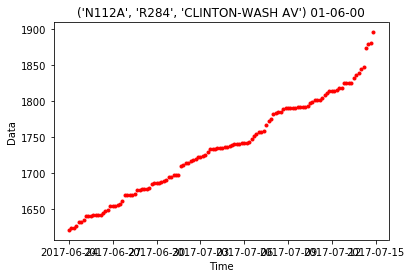

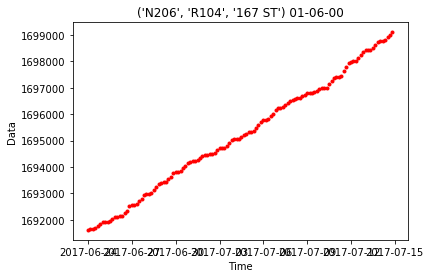

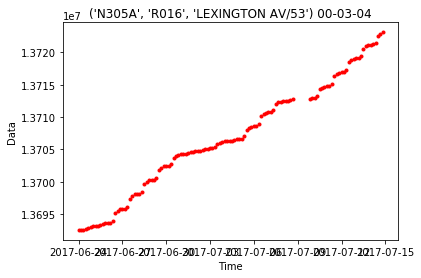

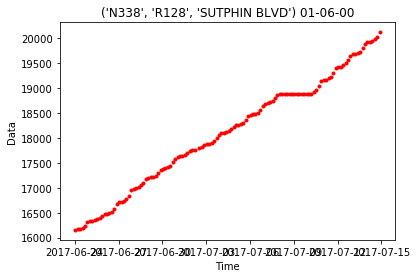

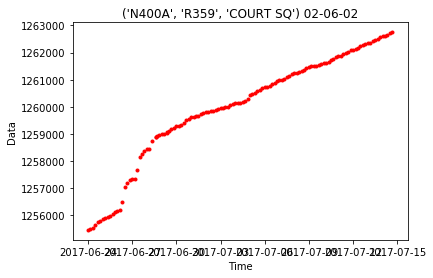

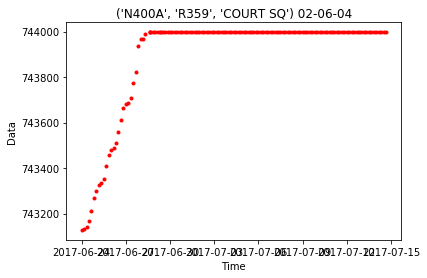

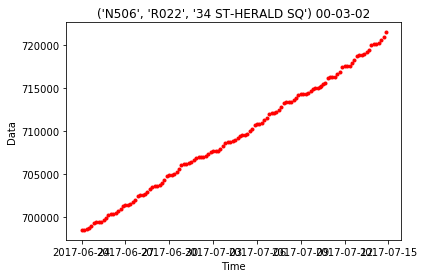

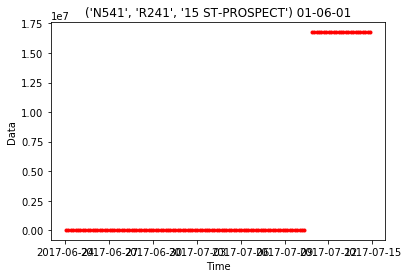

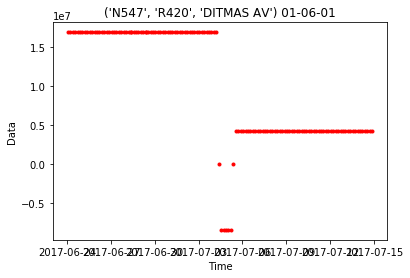

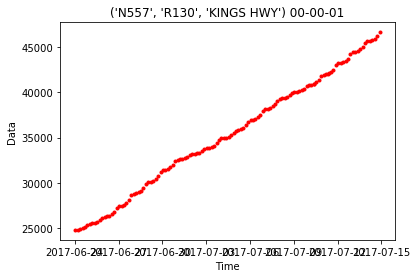

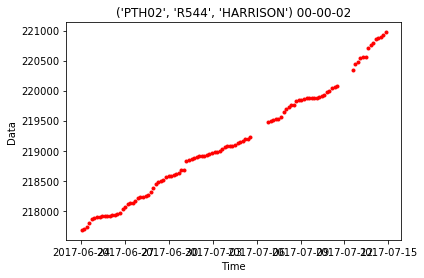

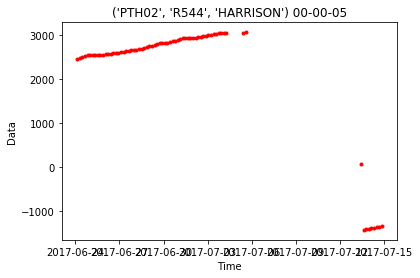

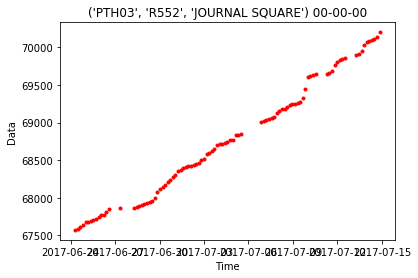

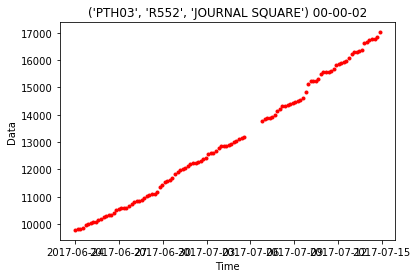

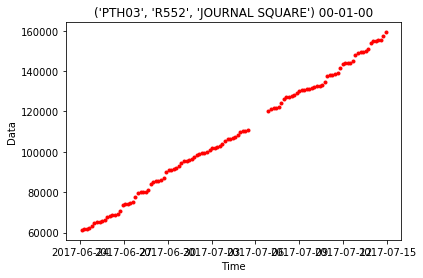

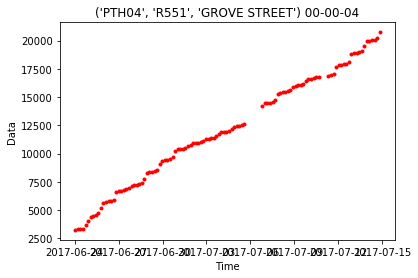

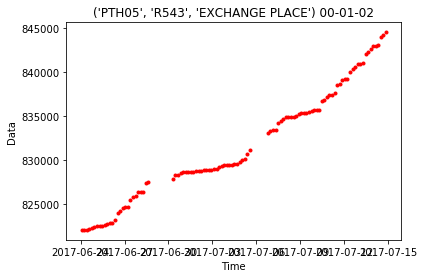

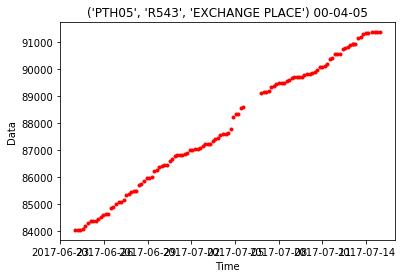

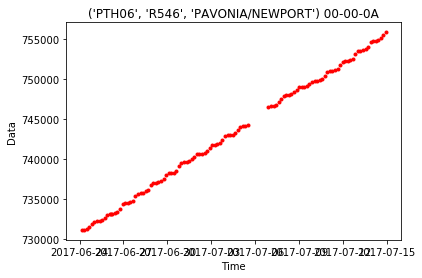

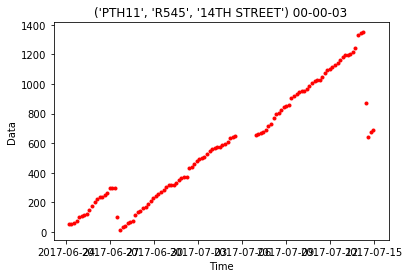

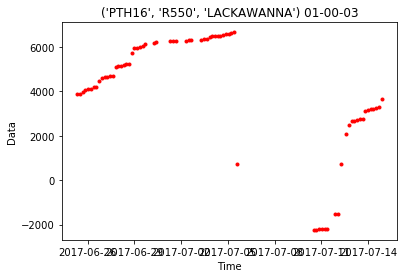

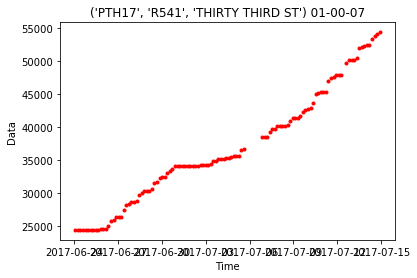

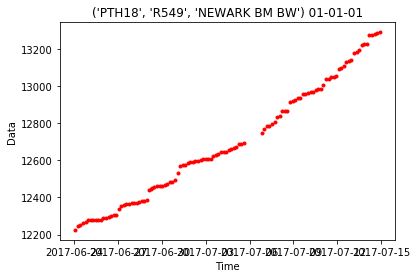

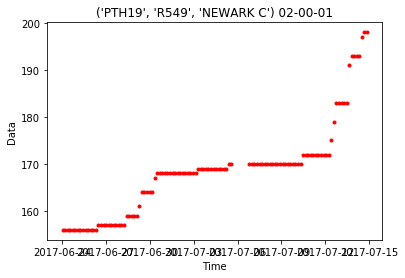

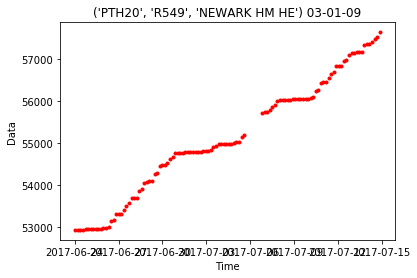

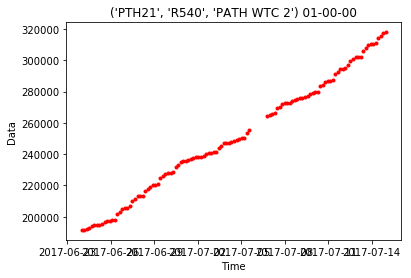

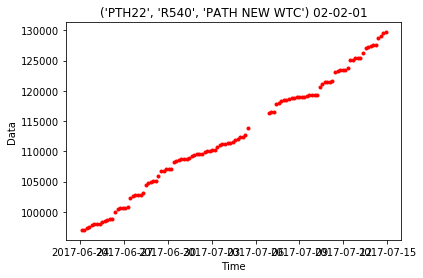

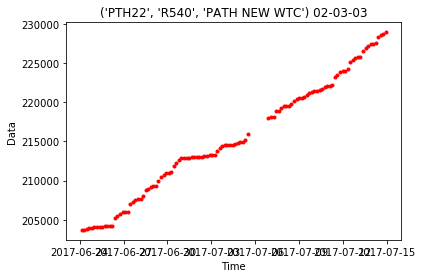

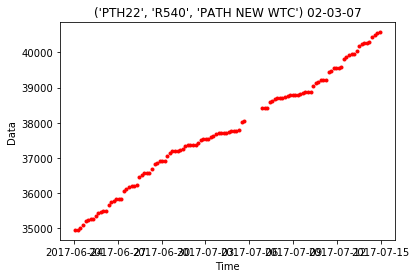

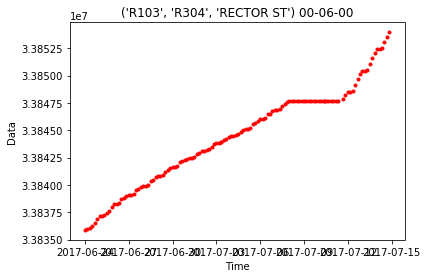

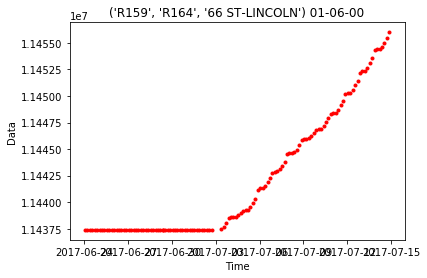

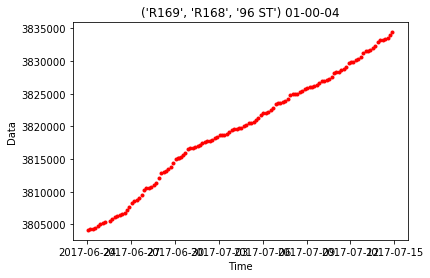

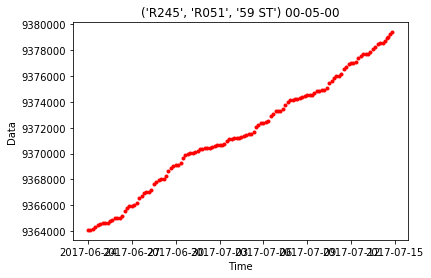

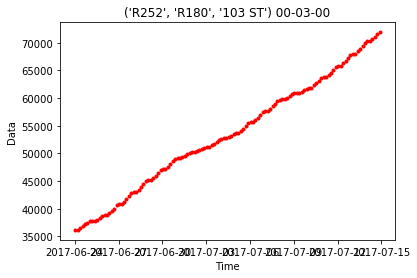

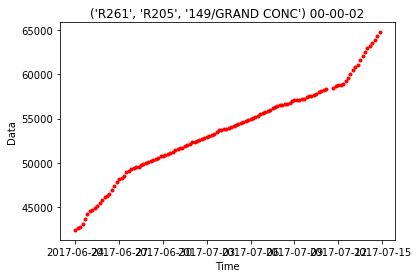

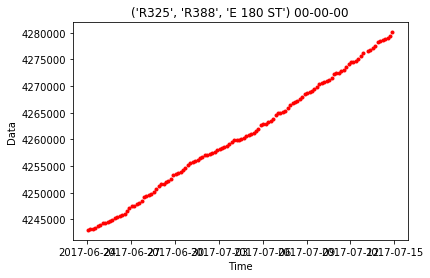

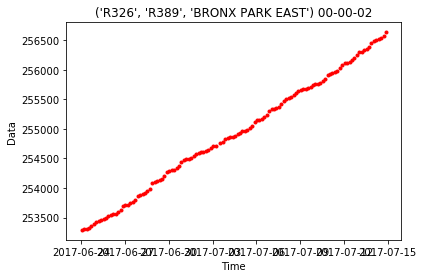

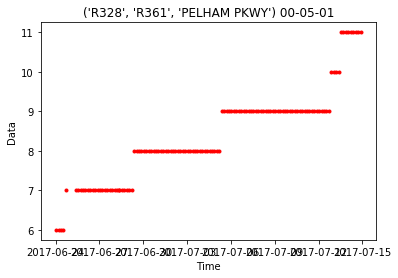

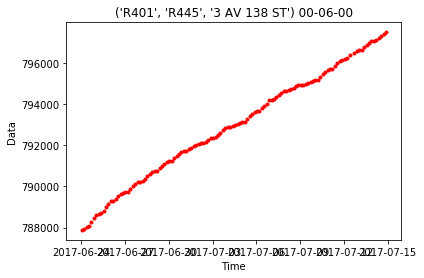

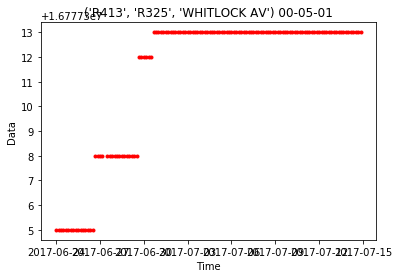

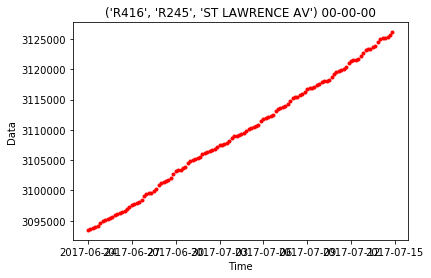

In [16]:
toClean = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue
                
            #print("Problem Detected: ",st,scp)
            #print(lst[i-1],lst[i],lst[i+1])
            key = (st,scp)
            toClean[key] = trouble.get(key,0)+1
            
for k in toClean.keys():
    if(isMonotoneDecrease(k)):
        fixMonotoneDecrease(k)
    garbageEliminator(k)
    dealingWithReset(k)
    inspection2(k)

In [17]:
# A Place to Test Some Data
del bigDict[(("N547","R420","DITMAS AV"))]["01-06-01"]
del bigDict[("PTH02","R544","HARRISON")]["00-00-05"]
print("Deleted")

Deleted


### Specific Time Extraction Function
Input: List of a single **Turnstile**, Start Time, End Time

Output: **(Float)** Number of Riders for that day in that timeframe. **(Linear) Approximation** is used in case of incomplete information

In [18]:
def cleanPeople(n): #Just a cleanup function
    if(n<0):
        return 0
    if(n>10000):
        return 0
    return n

noDay = dt(2018,4,4,0,0,0)-dt(2018,4,4,0,0,0)
#print(noDay)


from datetime import datetime as dt
def getRangeRider(turnstileList,startTime,endTime):
    ret = 0 #Return Value
    n = len(turnstileList)
    totalTime = endTime-startTime
    #print("Total Time:",totalTime) #Debugging Purpose
    for i in range(n-1): #A list of N items has (N-1) consecutive pairs
        ti = turnstileList[i][0]
        tf = turnstileList[i+1][0]
        if((tf<startTime) or (ti>endTime)):
            continue #Non-overlap Time Segment
        #Overlapping Time
        segmentTime = min(tf,endTime) - max(ti,startTime)
        fullSegment = tf-ti
        if(fullSegment==noDay): #Dealing with Bug
            return 0
        weight = segmentTime/fullSegment
        peopleCount = turnstileList[i+1][1]-turnstileList[i][1]
        peopleCount = cleanPeople(peopleCount)
        #print("Considering",ti,"to",tf,"Weight:",weight,"Riders:",peopleCount) #Debugging Purpose
        ret+= (weight)*peopleCount
    return ret

#Test
t1 = dt.strptime("2017-06-24 05:00:00","%Y-%m-%d %H:%M:%S")
t2 = dt.strptime("2017-06-24 09:00:00","%Y-%m-%d %H:%M:%S")

ans = getRangeRider(bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"],t1,t2)
print(ans)

18.0


In [19]:
#This function take a dictionary of a station as a input, it will call getRangeRider for each turnstile
def getStationRangeRider(stationDict,startTime,endTime):
    #print("Riders between",startTime,endTime)
    ret = 0
    for k,v in stationDict.items():
        
        cur = getRangeRider(v,startTime,endTime)
        ret+= cur
        #print("Turnstile",k,":",cur)
    return ret

#Example Usage
ans = getStationRangeRider(bigDict[('R204', 'R043', 'WALL ST')],dt(2017,6,27,6,0,0),dt(2017,6,28,6,0,0))
print(ans)

9834.0


## Commuter?

In [20]:
def isWeekday(t): #Input: Datetime object Output: True if it is weekday, False otherwise
    s = int(t.strftime("%w"))
    #print(s)
    if(s>=1 and s<=5):
        return True
    return False

def getDayOfWeek(t): # 0: Sunday
    return int(t.strftime("%w"))

#Example Usage
#d1 = dt(2017,6,26,0,0,0)
#print(isWeekday(d1))

In [21]:
oneDay = dt(2018,4,4,0,0,0)-dt(2018,4,3,0,0,0)
#print(oneDay)

import numpy as np
def getCommuteIndex(st):
    startDate = dt(2017,6,24,0,0,0)
    weekday = []
    weekend = []
    for i in range(21):
        people = getStationRangeRider(bigDict[st],startDate,startDate+oneDay)
        if(isWeekday(startDate)):
            weekday.append(people)
        else:
            weekend.append(people)
        startDate += oneDay
    dayavg = np.average(weekday)
    endavg = np.average(weekend)
    if(endavg==0):
        return 0
    #print("At",st,dayavg,endavg)
    idx = dayavg/endavg
    return idx

#Example Usage
q = getCommuteIndex(('PTH11', 'R545', '14TH STREET'))
print(q)

1.74804066954


In [22]:
commuteRanking = []
for k in bigDict.keys():
    idx = getCommuteIndex(k)
    commuteRanking.append((idx,k))
commuteRanking.sort(reverse = True)
for k in commuteRanking:
    print(k[0],k[1])

13557.6 ('R204A', 'R043', 'WALL ST')
4906.4 ('R137', 'R031', '34 ST-PENN STA')
3727.27179487 ('R237B', 'R047', 'GRD CNTRL-42 ST')
1043.86666667 ('R230', 'R143', '28 ST')
795.810526316 ('R237', 'R046', 'GRD CNTRL-42 ST')
562.362790698 ('R112A', 'R027', 'WALL ST')
391.155555556 ('R600', 'R224', 'CLARK ST')
375.292151899 ('R113', 'R028', 'FULTON ST')
337.173913043 ('R115', 'R029', 'PARK PLACE')
258.653333333 ('K026', 'R100', 'METROPOLITAN AV')
230.543478261 ('R605', 'R456', 'HOYT ST')
177.869879518 ('R606', 'R225', 'HOYT ST')
158.126801153 ('R114', 'R028', 'FULTON ST')
60.9486810552 ('K017', 'R401', 'CENTRAL AV')
55.6712394705 ('K025', 'R404', 'FRESH POND RD')
52.9202108963 ('K019', 'R413', 'KNICKERBOCKER')
41.4169491525 ('K022', 'R402', 'SENECA AVE')
41.2554197229 ('R111', 'R027', 'WALL ST')
37.1905418719 ('R110', 'R027', 'WALL ST')
34.6496685365 ('N304', 'R015', '5 AV/53 ST')
15.4886597938 ('K024', 'R403', 'FOREST AVE')
8.30378578024 ('A031', 'R083', '23 ST')
6.82270955166 ('R210A', 'R0

In [51]:
#Test Space
#print(getCommuteIndex(('R204A', 'R043', 'WALL ST')))
#getStationRangeRider(bigDict[('R204A', 'R043', 'WALL ST')],dt(2017,6,25,6,0,0),dt(2017,6,26,6,0,0))

Turnstile 03-05-00 : 0.0
Turnstile 03-05-01 : 0.0
Turnstile 03-06-00 : 1.0
Turnstile 03-06-01 : 0.0
Turnstile 03-05-00 : 0.0
Turnstile 03-05-01 : 0.0
Turnstile 03-06-00 : 0.0
Turnstile 03-06-01 : 0.0
Turnstile 03-05-00 : 0.0
Turnstile 03-05-01 : 0.0
Turnstile 03-06-00 : 1691.0
Turnstile 03-06-01 : 775.0
Turnstile 03-05-00 : 0.0
Turnstile 03-05-01 : 0.0
Turnstile 03-06-00 : 1853.0
Turnstile 03-06-01 : 811.0
Turnstile 03-05-00 : 0.0
Turnstile 03-05-01 : 0.0
Turnstile 03-06-00 : 1934.0
Turnstile 03-06-01 : 843.0
Turnstile 03-05-00 : 0.0
Turnstile 03-05-01 : 0.0
Turnstile 03-06-00 : 1799.0
Turnstile 03-06-01 : 800.0
Turnstile 03-05-00 : 0.0
Turnstile 03-05-01 : 0.0
Turnstile 03-06-00 : 1606.0
Turnstile 03-06-01 : 680.0
Turnstile 03-05-00 : 0.0
Turnstile 03-05-01 : 0.0
Turnstile 03-06-00 : 0.0
Turnstile 03-06-01 : 0.0
Turnstile 03-05-00 : 0.0
Turnstile 03-05-01 : 0.0
Turnstile 03-06-00 : 0.0
Turnstile 03-06-01 : 0.0
Turnstile 03-05-00 : 0.0
Turnstile 03-05-01 : 2.0
Turnstile 03-06-00 : 952.

5.0